## Saving Souls

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [56]:
data = pd.read_csv('titanic_train.csv')

In [57]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


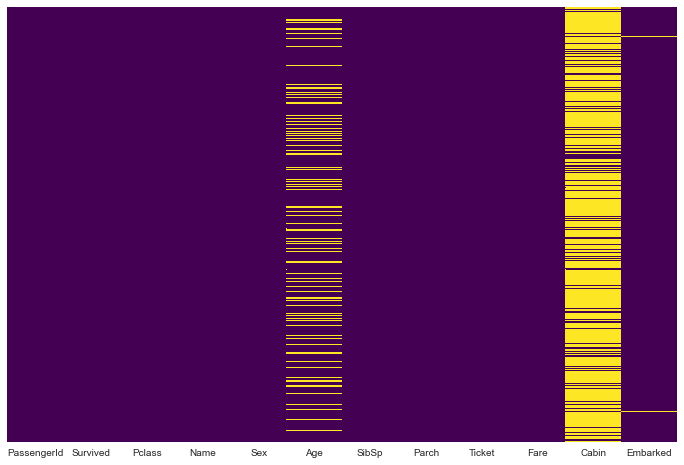

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False,cmap='viridis')
plt.show()

In [6]:
data.drop(['Cabin','Name','Ticket','PassengerId'], axis=1, inplace=True)

In [7]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
886,0,2,male,27.0,0,0,13.00,S
887,1,1,female,19.0,0,0,30.00,S
888,0,3,female,NaN,1,2,23.45,S
889,1,1,male,26.0,0,0,30.00,C
890,0,3,male,32.0,0,0,7.75,Q


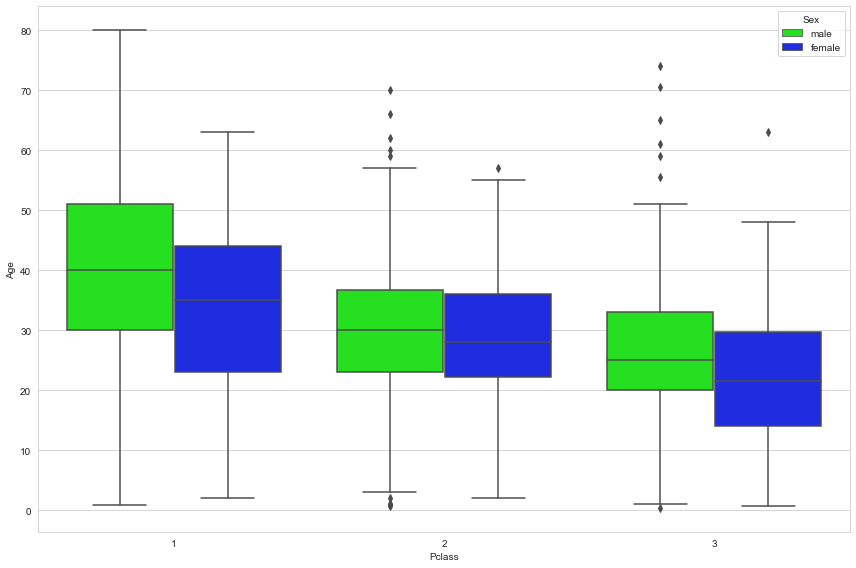

In [8]:
plt.figure(figsize=(12,8)) 
sns.boxplot(x='Pclass',y='Age',data = data,hue='Sex',palette='hsv')
plt.tight_layout()
plt.show()

In [9]:
def missingAge(resolver):
    age = resolver[0]
    pclass = resolver[1]
    sex = resolver[2]      
    
    if pd.isnull(age):
            
        if pclass == 1:
                
            if sex == 'male':
                return 40
                    
            if sex == 'female':
                return 35
                    
        if pclass == 2:
                
            if sex == 'male':
                 return 30
                    
            if sex == 'female':
                return 28
        
        if pclass == 3:
                
            if sex == 'male':
                return 24
                    
            if sex == 'female':
                return 22
    else:
        return age       

In [10]:
data['Age'] = data[['Age','Pclass','Sex']].apply(missingAge,axis=1)

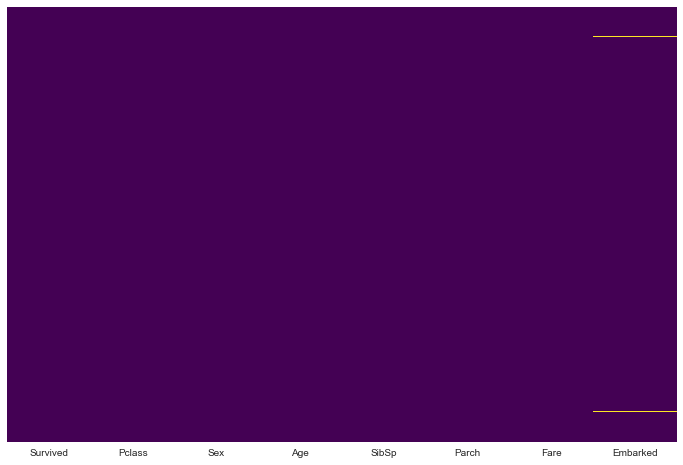

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False,cmap='viridis')
plt.show()

In [12]:
data.dropna(inplace=True)

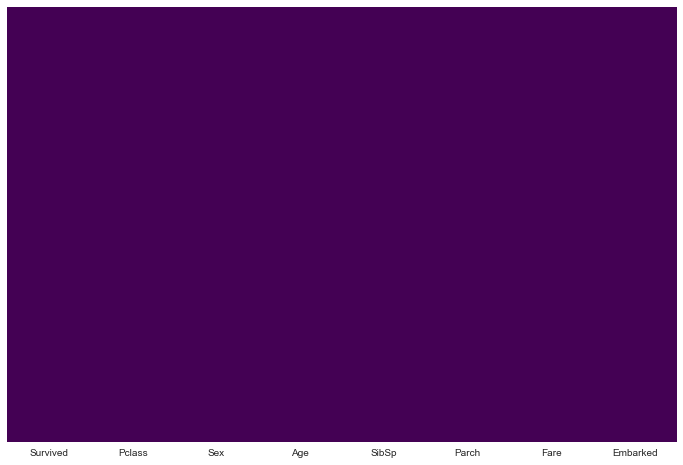

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False,cmap='viridis')
plt.show()

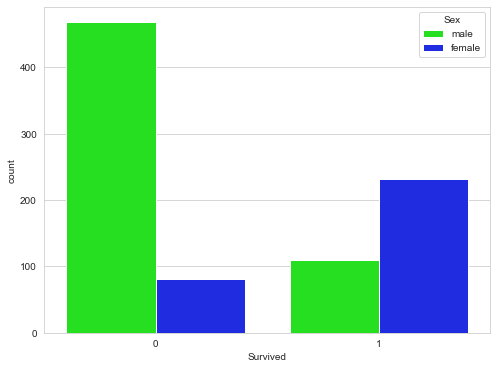

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'Survived', data = data,hue='Sex',palette='hsv')
plt.show()

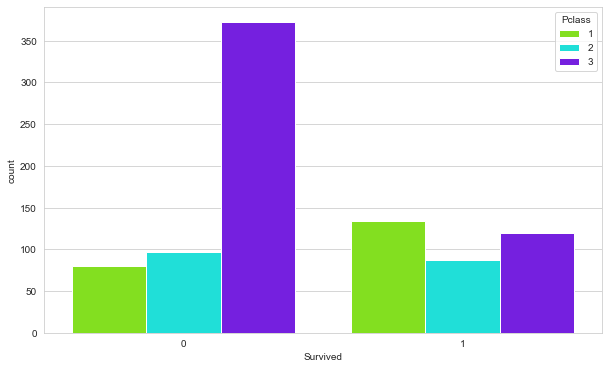

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Survived', data = data,hue='Pclass',palette='hsv')
plt.show()

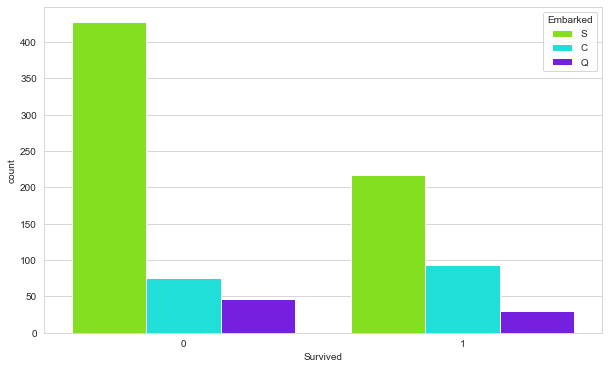

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'Survived', data = data,hue='Embarked',palette='hsv')
plt.show()

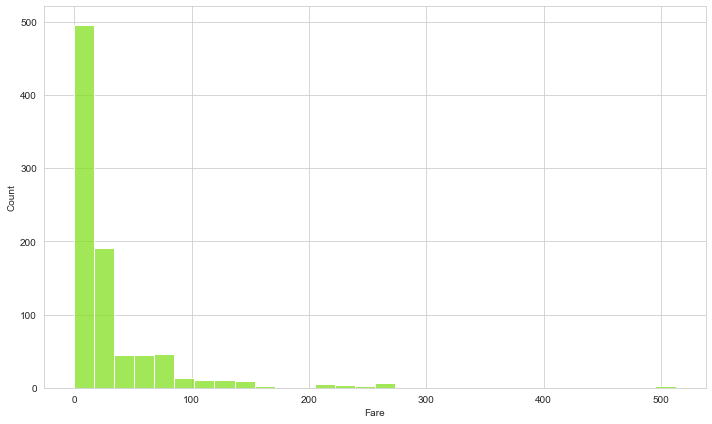

In [17]:
plt.figure(figsize = (10,6))
sns.histplot(data['Fare'], bins = 30, color='#83DF20')
plt.tight_layout()
plt.show()

In [18]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [19]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [20]:
data = pd.concat([data,sex,embark],axis=1)

In [21]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [22]:
x = data.drop('Survived',axis=1)

In [23]:
x

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
888,3,22.0,1,2,23.4500,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [24]:
y = data['Survived']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=101)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
regressor = LogisticRegression(solver='lbfgs', max_iter=1000)

In [29]:
regressor.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred = regressor.predict(x_test)

In [31]:
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [33]:
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_test,y_pred)

0.8352059925093633

# Testing data

In [35]:
data2 = pd.read_csv('titanic_test.csv')

In [36]:
data2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


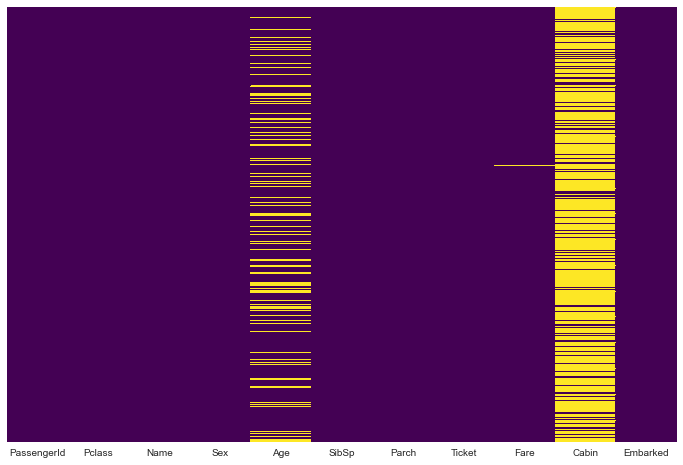

In [37]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.isnull(), yticklabels = False, cbar = False,cmap='viridis')
plt.show()

### Here we have to repeat the same steps as we have done before with the testing data

In [38]:
data2.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [39]:
data2.drop(['PassengerId','Cabin','Name','Ticket'], axis = 1, inplace = True)

In [40]:
data2['Age'] = data2[['Age','Pclass','Sex']].apply(missingAge,axis=1)

In [41]:
data2.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [42]:
data2.dropna(inplace = True)

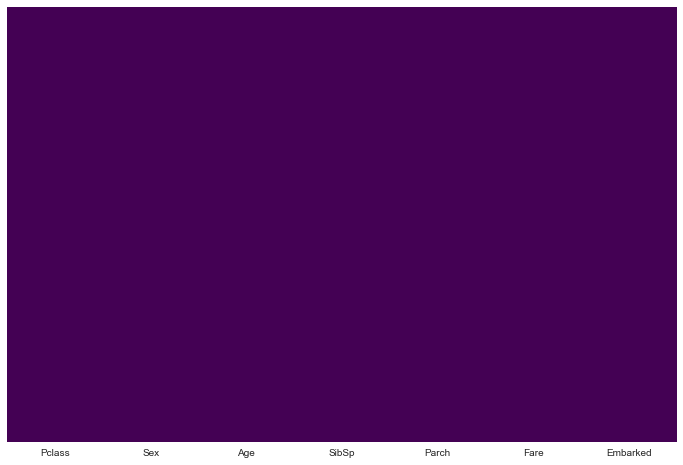

In [43]:
plt.figure(figsize=(12,8))
sns.heatmap(data2.isnull(), yticklabels = False, cbar = False,cmap='viridis')
plt.show()

In [44]:
sex = pd.get_dummies(data2['Sex'],drop_first=True)
embark = pd.get_dummies(data2['Embarked'],drop_first=True)

In [45]:
data2.drop(['Sex','Embarked'],axis=1,inplace=True)

In [46]:
data2 = pd.concat([data2,sex,embark],axis=1)

In [47]:
data2.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object')

In [48]:
data2.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [49]:
x_test2 = data2.iloc[:,:]

In [50]:
x_test2

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1
...,...,...,...,...,...,...,...,...
413,3,24.0,0,0,8.0500,1,0,1
414,1,39.0,0,0,108.9000,0,0,0
415,3,38.5,0,0,7.2500,1,0,1
416,3,24.0,0,0,8.0500,1,0,1


In [51]:
y_pred2 = regressor.predict(x_test2)

In [ ]:
#as no data for checking this result we cannot predict accuracy on y_pred2